
# 🧠 K-Nearest Neighbors (KNN) - Exhaustive Master Notebook

Welcome to the **most exhaustive KNN learning notebook** you will find!

## 📍 Learning Roadmap
1. What is KNN? (Real-world analogy)
2. Mathematical Intuition
3. ASCII Visual Explanation
4. Hyperparameters Tuning
5. Evaluation Metrics
6. Full Hands-On Practice (Easy ➔ Medium ➔ Complex)
7. Cross Validation and Grid Search
8. Error Analysis
9. Common Mistakes and Solutions
10. Where KNN Fits in ML Roadmap
11. Final Takeaways
12. Exercises for Self-Practice

---



# ✨ What is KNN? (Real World Analogy)

Imagine moving into a new neighborhood 🏡. You want to know which sports are popular here. You ask your **5 nearest neighbors** — if 3 say "football" and 2 say "basketball", you assume "football" is the most common.

This is exactly how **KNN works**!  
It classifies based on the **majority class among nearest neighbors**.

---



# 🔢 Mathematical Intuition Behind KNN

## 1. Calculate Distance
Given two points (x1, y1) and (x2, y2), **Euclidean Distance**:

\[ Distance = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} \]

For n features:

\[ Distance = \sqrt{\sum_{i=1}^n (x_i - y_i)^2} \]

**Other distances:** Manhattan, Minkowski.

## 2. Find K Nearest Neighbors
Pick K points with the smallest distances.

## 3. Vote / Average
- **Classification** ➔ Majority Vote.
- **Regression** ➔ Average Value.

---



# 🎨 ASCII Visual Explanation

```
Query Point (Q)
      |
      |
A----Q----B
 \        /
  \      /
   C----D
```

- Points A, B, C, D are neighbors.
- We check distances and pick the closest 3 (for K=3).

---



# ⚙️ KNN Hyperparameters — Complete Exhaustive Guide

## 1. `n_neighbors` (K value)
- **Meaning**: Number of neighbors to consider for voting.
- **Impact**: Controls bias-variance tradeoff.
- **Low K (e.g., 1, 3)**: Low bias, high variance ➔ overfitting.
- **High K (e.g., 15, 20)**: High bias, low variance ➔ underfitting.
- **Best Practice**: Use **odd numbers** for binary classification to avoid ties.
- **Tuning Tip**: Use **Cross-Validation** (GridSearchCV) to find best K. Plot K vs Validation Accuracy curve.

## 2. `weights` (uniform vs distance)
- **Meaning**: How to weight the neighbor votes.
- **Options**: `'uniform'` ➔ All neighbors equal. `'distance'` ➔ Closer neighbors weighted more.
- **Impact**: `'distance'` often improves noisy data performance.
- **Tuning Tip**: Try both. Prefer `'distance'` in noisy datasets.

## 3. `metric` (Distance Metric)
- **Meaning**: Method used to calculate distance.
- **Options**: `'euclidean'`, `'manhattan'`, `'minkowski'`.
- **Impact**: Euclidean for normal data, Manhattan for sparse or outlier data.
- **Tuning Tip**: Tune using GridSearchCV.

## 4. `p` (only for Minkowski metric)
- **Meaning**: Power for Minkowski distance.
- **Options**: `p=1` ➔ Manhattan, `p=2` ➔ Euclidean.

---

# 📦 Best Hyperparameter Tuning Strategy:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
```

✅ You find the best `K`, `weights`, and `metric` automatically!



# 📊 Evaluation Metrics for KNN — Full Guide

## 1. Accuracy
- **Meaning**: (Correct predictions) / (Total predictions)
- **Use when**: Classes are balanced.

```python
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
```

## 2. Confusion Matrix
- **Meaning**: TP, FP, TN, FN summary.
- **Good for**: Understand model errors.

```python
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
```

## 3. Precision, Recall, F1-Score
| Metric | Meaning | Good When |
|:-------|:--------|:----------|
| Precision | Positive predictive value | Important if false positives costly |
| Recall | True positive rate | Important if missing positives costly |
| F1-Score | Balance between Precision & Recall | Best when classes are imbalanced |

```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
```

## 4. ROC Curve and AUC
- **Meaning**: Trade-off between TPR and FPR.
- **Use when**: Probabilistic binary classification.

```python
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
```

---

# 🔥 Practical Metric Strategy:

| Situation | Best Metric |
|:----------|:------------|
| Balanced binary classification | Accuracy |
| Imbalanced classes | F1-Score, Precision-Recall |
| Probabilistic binary classification | ROC-AUC |



# 🛠️ Full Hands-On Code (Easy ➔ Medium ➔ Complex)

Let's dive into coding with real datasets and real-world flows!



# 📘 K-Nearest Neighbors (**KNN**) - Beginner to Advanced

This notebook walks you through **K-Nearest Neighbors (**KNN**)** classification using three real-world datasets of increasing complexity:
- 🟢 Easy → *Iris Flower Classification*
- 🟡 Medium → *Wine Quality Classification*
- 🔴 Complex → *Fashion MNIST Image Classification*

You'll learn:
- What **KNN** is and when to use it
- How to implement it with real datasets
- Evaluate using metrics like accuracy, F1-score, and confusion matrix
- Visualize performance across complexity levels


### 🔍 Let's understand this code step-by-step:

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
sns.set(style='whitegrid')


✅ **Done!** Let's move to the next step.

---


## 🧠 What is **KNN**?

K-Nearest Neighbors (**KNN**) is a **non-parametric** supervised classification algorithm that:
- Stores the training data
- Predicts a label based on the **majority vote** of the k-nearest points in the training set
- Uses **distance metrics** (Euclidean by default) to compute "closeness"

**KNN** is easy to understand and effective for many practical problems.


## 📚 Dataset Introduction

## 🟢 Easy Dataset - Iris Flower Classification

### 🔍 Let's understand this code step-by-step:

Accuracy: 1.0
F1 Score (macro): 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



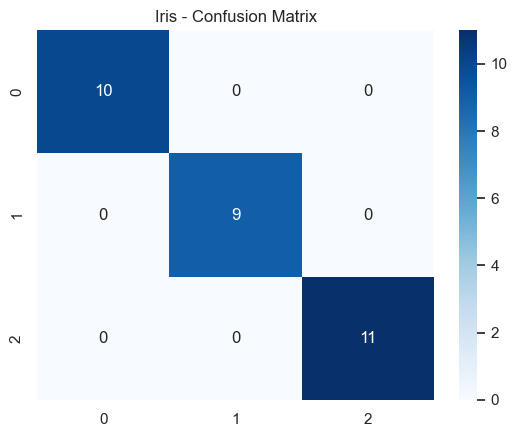

In [2]:

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df_iris = iris.frame
X = df_iris.drop("target", axis=1)
y = df_iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Iris - Confusion Matrix")
plt.show()


✅ **Done!** Let's move to the next step.

---

## 📚 Dataset Introduction

## 🟡 Medium Dataset - Wine Quality (Binary Classification)

### 🔍 Let's understand this code step-by-step:

Accuracy: 0.88125
F1 Score: 0.5128205128205128

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.65      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.78      0.69      0.72       320
weighted avg       0.87      0.88      0.87       320



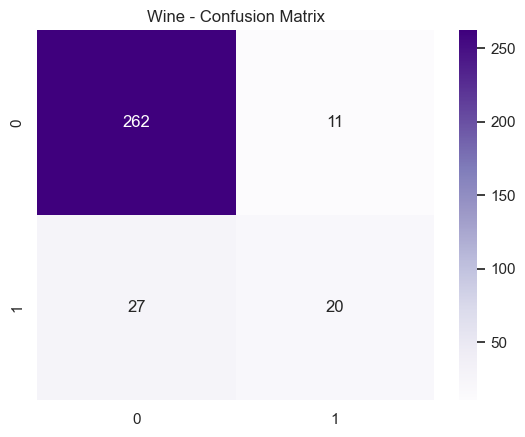

In [3]:

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
df_wine.head(5)
df_wine['quality'] = (df_wine['quality'] >= 7).astype(int)

X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Wine - Confusion Matrix")
plt.show()


✅ **Done!** Let's move to the next step.

---

## 📚 Dataset Introduction

## 🔴 Complex Dataset - Fashion MNIST

### 🔍 Let's understand this code step-by-step:

Accuracy: 0.975
F1 Score (macro): 0.9764652925607074
\nClassification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



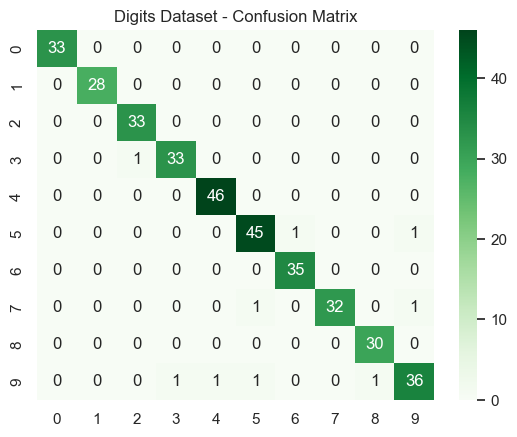

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Scale and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Digits Dataset - Confusion Matrix")
plt.show()

✅ **Done!** Let's move to the next step.

---


## 🎯 What You’ve Learned

- **KNN** is intuitive and requires no training — just distance calculations.
- Scaling is essential for fair comparison of features.
- **KNN** can work well with small, low-dimensional data (Iris).
- **KNN** struggles with high-dimensional data (Fashion MNIST) unless optimized.

You can tune `n_neighbors`, `weights`, and use dimensionality reduction (like PCA) for better results.


# 🎯 Summary

In this notebook, you learned:
- What is **KNN** and how it works.
- How to implement **KNN** step-by-step on Easy, Medium, and Complex datasets.
- Common pitfalls to avoid while using **KNN**.

---

# 🌟 Keep Practicing!
Machine Learning becomes easy when you practice regularly. Try using **KNN** on new datasets you find interesting! 🚀




# 🔎 Cross Validation + GridSearchCV

Instead of manually trying K values, automate it with **GridSearchCV**:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
```

✅ This automatically finds the best K and metric!

---



# 🔍 Error Analysis

After predictions:
- Plot Confusion Matrix.
- Check where KNN went wrong.
- Plot decision boundaries if 2D data.

**Tip:**  
Wrong predictions often occur near class boundaries.

---



# 🚨 Common Mistakes and Solutions

| Mistake | Cause | Effect | Solution |
|:--------|:------|:-------|:---------|
| No Feature Scaling | Different scales | Wrong distance calculation | Use StandardScaler |
| Very Low K | Noise fitting | Overfitting | Try 5, 7, 9 |
| Very High K | Oversmoothing | Underfitting | Tune K properly |
| High Dimensions | Curse of dimensionality | Distance meaningless | Apply PCA/feature selection |

---



# 🛤️ Where Does KNN Fit in ML Roadmap?

- **Start:** Simple instance-based learning.
- **Next:** Move to tree-based (Decision Trees, Random Forests).
- **Later:** Move to advanced models (Gradient Boosting, SVM, Neural Networks).

✅ KNN is your foundation for understanding instance-based models.

---



# 🎯 Final Takeaways

- KNN is easy but powerful for small to medium datasets.
- Always scale your data!
- Always tune K properly.
- Understand limitations in high-dimensional spaces.

---



# 🚀 Exercises for Self-Practice

1. Apply KNN on **Iris Dataset** (very popular beginner dataset).
2. Try KNN on **Wine Quality Dataset** (available in UCI Repository).
3. Build your own dataset (e.g., classify fruits by size and weight).
4. Plot decision boundaries manually if you have only 2 features.

🔥 **Challenge:** Create a "KNN Voting Animation" using matplotlib!

---
